In [1]:
# Clone the Darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 15298 (delta 1), reused 7 (delta 1), pack-reused 15289
Receiving objects: 100% (15298/15298), 13.70 MiB | 16.40 MiB/s, done.
Resolving deltas: 100% (10383/10383), done.


In [3]:
# Enable GPU and OPENCV
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [2]:
# Verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# Make the Darknet build
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## Define imShow, upload, and download functions

In [5]:
# Function to show predictions
def imShow(path):
  import matplotlib.pyplot as plt
  import cv2
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Function for uploading files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# Function for downloading files
def download(path):
  from google.colab import files
  files.download(path)

## Set up the Algorithm

In [6]:
# Mount Google Drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [7]:
# Makes the path /content/gdrive/My\ Drive/ equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 ColabNotebooks        'Old Videos'    'Tira '
 ElementsAcademyStuff  'Other stuff'   'Tira Game Design '
 MonkeyHealth	        Screencastify  'Tira General Development'


In [8]:
# Print a list of all files of the MonkeyHealth folder
!ls /content/gdrive/MyDrive/MonkeyHealth

 backup
'Copy of Monkey Health Prototype 1 YOLOv3_Tutorial.ipynb'
 generate_train.py
 images
 MHTestImage3.jpeg
'Monkey Health Final.ipynb'
'Monkey Health Prototype 1 YOLOv3_Tutorial.ipynb'
 obj2.zip
 obj3.zip
 obj.data
 obj.names
 obj.zip
 yolov3_custom.cfg
 yolov3_custom.cfg.docx


In [9]:
# Make sure we are on the darknet directory
# Sometimes, a folder called "data" will be created outside of the darknet folder when unzipping the obj.zip file
# so we do this to make sure the obj.zip file is unzipped inside the /darknet/data/obj directory
import os
os.chdir('/content/darknet')

In [10]:
# Copy the .zip file into the root directory of cloud VM
!cp /content/gdrive/MyDrive/MonkeyHealth/obj.zip ../

In [11]:
# Unzip the zip file
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/classes.txt    
  inflating: data/obj/MH1.jpeg       
  inflating: data/obj/MH1.txt        
  inflating: data/obj/MH10.jpeg      
  inflating: data/obj/MH10.txt       
  inflating: data/obj/MH100.jpeg     
  inflating: data/obj/MH100.txt      
  inflating: data/obj/MH101.jpeg     
  inflating: data/obj/MH101.txt      
  inflating: data/obj/MH102.jpeg     
  inflating: data/obj/MH102.txt      
  inflating: data/obj/MH103.jpeg     
  inflating: data/obj/MH103.txt      
  inflating: data/obj/MH104.jpeg     
  inflating: data/obj/MH104.txt      
  inflating: data/obj/MH105.jpeg     
  inflating: data/obj/MH105.txt      
  inflating: data/obj/MH106.jpeg     
  inflating: data/obj/MH106.txt      
  inflating: data/obj/MH107.jpeg     
  inflating: data/obj/MH107.txt      
  inflating: data/obj/MH108.jpeg     
  inflating: data/obj/MH108.txt      
  inflating: data/obj/MH109.jpeg     
  inflating: data/obj/MH109.txt      
  inflating: data/obj/MH11.jp

In [12]:
# Upload the custom .cfg file back to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/MonkeyHealth/yolov3_custom.cfg ./cfg

In [13]:
# Upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/MonkeyHealth/obj.names ./data
!cp /content/gdrive/MyDrive/MonkeyHealth/obj.data  ./data

In [14]:
# Upload the generate_train.py script to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/MonkeyHealth/generate_train.py ./

In [15]:
# Run the Python script
!python generate_train.py

In [16]:
# Verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     voc.names
coco.names  goal.txt	 labels			   openimages.names
dog.jpg     horses.jpg	 obj			   person.jpg


## Run the Algorithm

In [17]:
# Set custom .cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

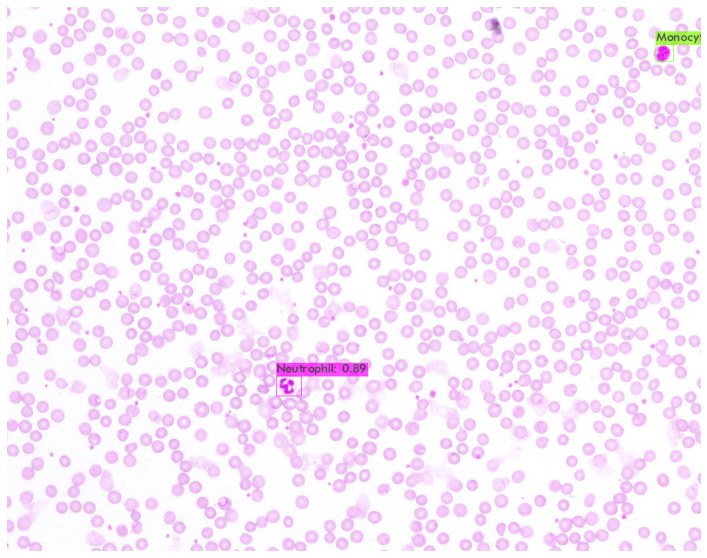

In [18]:
# Run the object detector based on an image from Google Drive
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/MonkeyHealth/backup/yolov3_custom_last.weights /content/gdrive/MyDrive/MonkeyHealth/images/MHTestImage3.jpeg -thresh 0.5 -dont_show
imShow('predictions.jpg')

!cp predictions.jpg /content/gdrive/MyDrive/MonkeyHealth/images/MH3Detection.jpeg